In [1]:
# Plot PKR functional scores by K3 contact sites (predicted sits)
# Figures 2F, 5F, and Supplemental Figure S4

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# figure save directory
save_dir = "../../results/figures/pkr-contact-k3"
os.makedirs(save_dir, exist_ok=True)

In [6]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'
df = pd.read_csv(input_file)

def pkr_type(x, pkr_stop = 551):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x[-2:] == 'WT':
        return "WT"
    else:
        return 'Variant'
df['pkr_type'] = df['pkr'].apply(pkr_type)

In [7]:
# eIF2a contacts 
eif2a_af2 = [274,275,276,279,335,337,338,339,340,341,342,379,382,451,452,453,483,486,487,488,489,490,491,492,493]
eif2a_pdb = [379,382,450,451,452,453,483,484,486,487,488,489,490,492,493]

# k3 contact info
pdb_contacts = [276,277,278,337,375,382,450,451,452,453,454,483,484,485,486,487,488,489,490,492,493,495,496]
af2_contacts = [275,276,278,304,339,343,345,375,379,382,414,416,435,448,449,450,451,452,453,455,460,485,486,487,488,489,490,492,493,496]

def pdb_contact(row):
    site = row['site']
    if site in pdb_contacts:
        return "K3 Contact"
    else:
        return "No Contact"

def af2_contact(row):
    site = row['site']
    if site in af2_contacts:
        return "K3 Contact"
    else:
        return "No Contact"

df['pdb_contact'] = df.apply(pdb_contact, axis=1)
df['af2_contact'] = df.apply(af2_contact, axis=1)

# differing
#set(pdb_contacts).intersection(set(af2_contacts))
#set(pdb_contacts) ^ set(af2_contacts)

PKR Variants Paired with K3Δ58


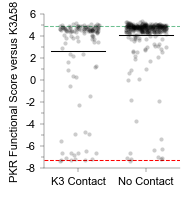

Group 1: 4.2574422148834135 1.806039813039537
Group 2: 2.123353657684435 4.292905653342117
T statistic: 7.233999397200658
p-value: 2.2036499227546232e-12
Degrees of Freedom: 425

The difference in mean Functional Score between PKR variants at conserved sites (M=4.26, SD=1.81) and sites under positive selection (M=2.12, SD=4.29 is significant (Independent T-test, t(425)=7.23, p=0.0).
PKR Variants Paired with K3


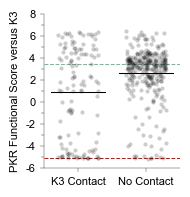

Group 1: 2.639312830772907 2.1976110402786295
Group 2: 0.8044938554445292 4.371062320049415
T statistic: 5.736319363839105
p-value: 1.8398414811521825e-08
Degrees of Freedom: 425

The difference in mean Functional Score between PKR variants at conserved sites (M=2.64, SD=2.2) and sites under positive selection (M=0.8, SD=4.37 is significant (Independent T-test, t(425)=5.74, p=0.0).
PKR Variants Paired with K3-H47R


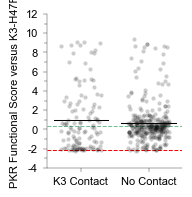

Group 1: 0.6113784472174292 2.002492548167388
Group 2: 1.284426705362028 3.467204000417276
T statistic: -2.5000044336126357
p-value: 0.012795074099121086
Degrees of Freedom: 425

The difference in mean Functional Score between PKR variants at conserved sites (M=0.61, SD=2.0) and sites under positive selection (M=1.28, SD=3.47 is significant (Independent T-test, t(425)=-2.5, p=0.0128).


In [8]:
# AlphaFold2 prediction, sites within 5 Ang of K3

for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):
    temp_df = df.query('k3 == @k3 and pkr_type != "Nonsense"')
    
    # plot parameters
    width_in = 1.75
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .2
    marker_diameter = 3 # 1.75
    #ymin = -5
    #ymax=5.9
    
    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    
    plt.rc('lines', linewidth=stroke)
    
    plt.figure(figsize=(width_in, height_in)) # save size
    
    ax = sns.stripplot(
        data=temp_df,
        x='af2_contact',
        y='auc_mean',
        color='black',
        alpha=alpha_val,
        size=marker_diameter,
        order = ['K3 Contact', 'No Contact'],
        jitter=.3,
        zorder=2
    )

    sns.boxplot(
        data=temp_df,
        x="af2_contact",
        y="auc_mean",
        order = ['K3 Contact', 'No Contact'],
        showmeans=True,
        meanline=True,
        meanprops={'color': 'black', 'ls': '-', 'lw': .75},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax,
        zorder=1
    )

    # y tick limits
    if k3 == "K3L-Null":
        plt.ylim(-8, 6)
    elif k3 == "K3L-WT":
        plt.ylim(-6, 8)
    elif k3 == "K3L-H47R":
        plt.ylim(-4, 12)
    
    # modify plot spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)

    # Set major ticks at even numbers and label as integers
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
    
    # Show minor ticks for every integer
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # Set major tick length
    ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')
    
    # wt dashed line
    hline = temp_df.query('pkr == "PKR-WT"')['auc_mean'].values[0]
    ax.axhline(y=hline, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)

    # nonsense dashed line
    hline = df.query('pkr_type == "Nonsense" and k3 == @k3')['auc_mean'].mean()
    ax.axhline(y=hline, color='red', linestyle='--', linewidth=.75, zorder=0)
    
    # x tick labels
    #new_labels = ['Conserved \nPKR Residue','Vertebrate \nPositive Selection']
    #ax.set_xticklabels(new_labels)
    #plt.xticks(rotation=45, ha='right')
    
    plt.title('')
    plt.xlabel('')
    plt.ylabel(f'PKR Functional Score versus {k3_name}')
    
    # save plot
    fig = ax.get_figure()
    plot_name = f'pkr-contact-k3_af2_{k3_name}.svg'
    output_file = os.path.join(save_dir, plot_name)
    fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)
 
    print(f'PKR Variants Paired with {k3_name}')
    plt.show()

    # stats: independent t-test (aka two-sample t test)
    group1 = temp_df[temp_df["pdb_contact"] == "No Contact"]['auc_mean']
    group2 = temp_df[temp_df["pdb_contact"] == "K3 Contact"]['auc_mean']
    print('Group 1:', group1.mean(), group1.std())
    print('Group 2:', group2.mean(), group2.std())
    
    t_statistic, p_value = ttest_ind(group1,group2)
    print('T statistic:',t_statistic)
    print('p-value:',p_value)
    
    degree_freedom = len(group1) + len(group2) - 2
    print('Degrees of Freedom:',degree_freedom)
    
    print()
    print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")


PKR Variants Paired with K3Δ58


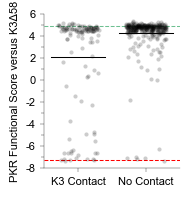

Group 1: 4.2574422148834135 1.806039813039537
Group 2: 2.123353657684435 4.292905653342117
T statistic: 7.233999397200658
p-value: 2.2036499227546232e-12
Degrees of Freedom: 425

The difference in mean Functional Score between PKR variants at conserved sites (M=4.26, SD=1.81) and sites under positive selection (M=2.12, SD=4.29 is significant (Independent T-test, t(425)=7.23, p=0.0).
PKR Variants Paired with K3


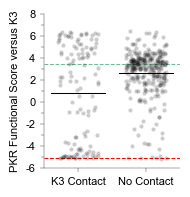

Group 1: 2.639312830772907 2.1976110402786295
Group 2: 0.8044938554445292 4.371062320049415
T statistic: 5.736319363839105
p-value: 1.8398414811521825e-08
Degrees of Freedom: 425

The difference in mean Functional Score between PKR variants at conserved sites (M=2.64, SD=2.2) and sites under positive selection (M=0.8, SD=4.37 is significant (Independent T-test, t(425)=5.74, p=0.0).
PKR Variants Paired with K3-H47R


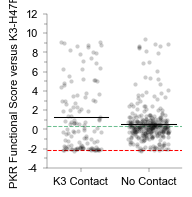

Group 1: 0.6113784472174292 2.002492548167388
Group 2: 1.284426705362028 3.467204000417276
T statistic: -2.5000044336126357
p-value: 0.012795074099121086
Degrees of Freedom: 425

The difference in mean Functional Score between PKR variants at conserved sites (M=0.61, SD=2.0) and sites under positive selection (M=1.28, SD=3.47 is significant (Independent T-test, t(425)=-2.5, p=0.0128).


In [9]:
# Aligning PDB crystal structures, sites within 5 Ang of K3 (missing loop regions)

for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):
    temp_df = df.query('k3 == @k3 and pkr_type != "Nonsense"')
    
    # plot parameters
    width_in = 1.75
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .2
    marker_diameter = 3 # 1.75
    #ymin = -5
    #ymax=5.9
    
    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    
    plt.rc('lines', linewidth=stroke)
    
    plt.figure(figsize=(width_in, height_in)) # save size
    
    ax = sns.stripplot(
        data=temp_df,
        x='pdb_contact',
        y='auc_mean',
        color='black',
        alpha=alpha_val,
        size=marker_diameter,
        order = ['K3 Contact', 'No Contact'],
        jitter=.3,
        zorder=2
    )

    sns.boxplot(
        data=temp_df,
        x="pdb_contact",
        y="auc_mean",
        order = ['K3 Contact', 'No Contact'],
        showmeans=True,
        meanline=True,
        meanprops={'color': 'black', 'ls': '-', 'lw': .75},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax,
        zorder=1
    )

    # y tick limits
    if k3 == "K3L-Null":
        plt.ylim(-8, 6)
    elif k3 == "K3L-WT":
        plt.ylim(-6, 8)
    elif k3 == "K3L-H47R":
        plt.ylim(-4, 12)
    
    # modify plot spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)

    # Set major ticks at even numbers and label as integers
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
    
    # Show minor ticks for every integer
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # Set major tick length
    ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')
    
    # wt dashed line
    hline = temp_df.query('pkr == "PKR-WT"')['auc_mean'].values[0]
    ax.axhline(y=hline, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)

    # nonsense dashed line
    hline = df.query('pkr_type == "Nonsense" and k3 == @k3')['auc_mean'].mean()
    ax.axhline(y=hline, color='red', linestyle='--', linewidth=.75, zorder=0)
    
    # x tick labels
    #new_labels = ['Conserved \nPKR Residue','Vertebrate \nPositive Selection']
    #ax.set_xticklabels(new_labels)
    #plt.xticks(rotation=45, ha='right')
    
    plt.title('')
    plt.xlabel('')
    plt.ylabel(f'PKR Functional Score versus {k3_name}')
    
    # save plot
    fig = ax.get_figure()
    plot_name = f'pkr-contact-k3_pdb_{k3_name}.svg'
    output_file = os.path.join(save_dir, plot_name)
    fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)
 
    print(f'PKR Variants Paired with {k3_name}')
    plt.show()

    # stats: independent t-test (aka two-sample t test)
    group1 = temp_df[temp_df["pdb_contact"] == "No Contact"]['auc_mean']
    group2 = temp_df[temp_df["pdb_contact"] == "K3 Contact"]['auc_mean']
    print('Group 1:', group1.mean(), group1.std())
    print('Group 2:', group2.mean(), group2.std())
    
    t_statistic, p_value = ttest_ind(group1,group2)
    print('T statistic:',t_statistic)
    print('p-value:',p_value)
    
    degree_freedom = len(group1) + len(group2) - 2
    print('Degrees of Freedom:',degree_freedom)
    
    print()
    print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")


PKR Variants Paired with K3


/tmp/ipykernel_3369732/3967526301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.query('pkr_type == "Variant"', inplace=True)


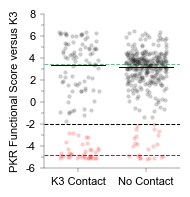

NonFunctional Variants
Group 1: -3.860276379275093 1.1270223735361395
Group 2: -4.4644247621823 0.7155568931465709
T statistic: 2.5503443065745843
p-value: 0.013332251298823327
Degrees of Freedom: 60

Functional Variants
Group 1: 3.066668330268286 1.447436038396092
Group 2: 3.746876979573798 2.270375386615068
T statistic: -3.203378944879016
p-value: 0.0014787157620977502
Degrees of Freedom: 362


In [10]:
# check if it actually separates statistically for K3-WT contacts
# threshold of 1.5
threshold = -2
k3 = 'K3-WT'
k3_name = 'K3'

temp_df = df.query('k3 == "K3L-WT"')

# line values
hline_wt = temp_df.query('pkr == "PKR-WT"')['auc_mean'].values[0]
hline_non = df.query('pkr_type == "Nonsense"')['auc_mean'].mean()

temp_df.query('pkr_type == "Variant"', inplace=True)
nonfunc_df = temp_df.query('auc_mean <= @threshold')
func_df = temp_df.query('auc_mean > @threshold')

# plot parameters
width_in = 1.75
height_in = 2
font_size = 8
font = 'Arial'
stroke = .25
tick_len = 3
alpha_val = .2
marker_diameter = 3 # 1.75
#ymin = -5
#ymax=5.9

font = {'family': font, 'size': font_size}
plt.rc('font', **font)
plt.rc('lines', linewidth=stroke)
plt.figure(figsize=(width_in, height_in)) # save size

# nonfunctional variants
ax = sns.stripplot(
    data=nonfunc_df,
    x='af2_contact',
    y='auc_mean',
    color='red',
    alpha=alpha_val,
    size=marker_diameter,
    order = ['K3 Contact', 'No Contact'],
    jitter=.3,
    zorder=2
)
# functional variants
sns.stripplot(
    data=func_df,
    x='af2_contact',
    y='auc_mean',
    color='black',
    alpha=alpha_val,
    size=marker_diameter,
    order = ['K3 Contact', 'No Contact'],
    jitter=.3,
    zorder=2,
    ax=ax
)

# functional mean
sns.boxplot(
    data=func_df,
    x="af2_contact",
    y="auc_mean",
    order = ['K3 Contact', 'No Contact'],
    showmeans=True,
    meanline=True,
    meanprops={'color': 'black', 'ls': '-', 'lw': .75},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False,
    ax=ax,
    zorder=1
)

# y tick limits
plt.ylim(-6, 8)

# modify plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(stroke)
ax.spines['bottom'].set_linewidth(stroke)

# Set major ticks at even numbers and label as integers
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))

# Show minor ticks for every integer
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))

# Set major tick length
ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')

# dashed lines
ax.axhline(y=hline_wt, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)
ax.axhline(y=hline_non, color='red', linestyle='--', linewidth=.75, zorder=0)
ax.axhline(y=threshold, color='black', linestyle='--', linewidth=.75, zorder=0)

# x tick labels
#new_labels = ['Conserved \nPKR Residue','Vertebrate \nPositive Selection']
#ax.set_xticklabels(new_labels)
#plt.xticks(rotation=45, ha='right')

plt.title('')
plt.xlabel('')
plt.ylabel(f'PKR Functional Score versus {k3_name}')

# save plot
fig = ax.get_figure()
plot_name = f'pkr-contact-k3_af2_bimodal-distribution_{k3_name}.svg'
output_file = os.path.join(save_dir, plot_name)
fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)

print(f'PKR Variants Paired with {k3_name}')
plt.show()

# stats
# independent t-test (aka two-sample t test)
print('NonFunctional Variants')
stat_df = nonfunc_df
group1 = stat_df[stat_df["pdb_contact"] == "No Contact"]['auc_mean']
group2 = stat_df[stat_df["pdb_contact"] == "K3 Contact"]['auc_mean']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()

print('Functional Variants')
stat_df = func_df
group1 = stat_df[stat_df["pdb_contact"] == "No Contact"]['auc_mean']
group2 = stat_df[stat_df["pdb_contact"] == "K3 Contact"]['auc_mean']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)